テキストの目的
実データに近いものに対して機械学習を行う

どのように学ぶか
Kaggleのデータセットを通じて、機械学習の基本的な流れやライブラリの使い方を学びます。

【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


何を学習し、何を予測するのか
どのようなファイルを作りKaggleに提出するか
提出されたものはどういった指標値で評価されるのか


In [ ]:
#Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測します。
#提出物は、予測された確率と観察されたターゲットの間のROC曲線の下の領域で評価されます。

# 提出ファイル
# テストセット内のSK_ID_CURRごとに、TARGET変数の確率を予測する必要があります。 ファイルにはヘッダーが含まれ、次の形式である必要があります。

# SK_ID_CURR、TARGET
# 100001,0.1
# 100005,0.9
# 100013,0.2
# 等

【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

            TARGET  ...  AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR          ...                            
100083           0  ...                         3.0
100145           0  ...                         3.0
100165           0  ...                         2.0
100179           0  ...                         4.0
100190           0  ...                         3.0
100193           0  ...                         6.0
100289           0  ...                         2.0
100295           1  ...                         1.0
100341           0  ...                         1.0
100343           0  ...                         1.0
100363           0  ...                         1.0
100366           0  ...                         0.0
100371           0  ...                         0.0
100376           0  ...                         1.0
100389           0  ...                         1.0
100395           0  ...                         2.0
100425           0  ...                         0.0
100479      

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5502798507462687

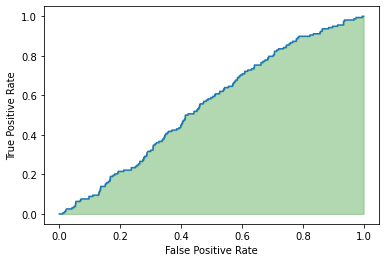

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
df = df.drop(columns=df.select_dtypes(include='object').columns)
df = df.dropna(how='any')
df = df.dropna(how='any', axis=1)
# print(df)
print(df.head(20))
print(len(df))
# print("デフォルトは先頭5行分が出力される。")
# s = '\n'
# print(s)
print(df.info())
# print(
#     ''''
#     このメソッドは、以下を含むDataFrameに関する情報を出力します。
# インデックスのdtypeと列、null以外の値、およびメモリ使用量。
#     '''
# )
# s = '\n'
# print(s)
# # print(df.describe())
# print(
#     ''''
#     記述統計には、中央を要約した統計が含まれます
# の傾向、分散および形状NaN値を除くデータセットの分布。
# 数値系列とオブジェクト系列の両方を分析します
#     '''
# )

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools


# df=df.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
# print(df.dropna(how='any'))
# df=df.dropna(how='any')
# df.str.extract(r'(\d+)').astype(int)
# print(df.dropna.astype(str))
# print(df.isnull().sum())
# x=df.iloc[:,2:123]
X=df.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
# np.random.seed(0)
# X= x.sample(n=10000)#サンプル数を10００0へ絞り込み
# print(type(X))
# print(len(X))
# print(X)
# print(X.info())
target = df.loc[:, ['TARGET']]
# np.random.seed(0)
# target = target.sample(n=10000)#サンプル数を10００0へ絞り込み
# print(target[:])
# print(type(target))
# print(len(target))

########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)

# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)



# #
# # 評価
# #
# # 平均絶対誤差(MAE)
# mae = mean_absolute_error(Y_test, Y_pred)
# # 平方根平均二乗誤差（RMSE）
# rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# # スコア
# score = lr.score(X_test, Y_test)

# print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
# print("Coef = ", lr.coef_)
# print("Intercept =", lr.intercept_)

#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)
# plt.xlabel("RM")
# plt.ylabel("Target")
# plt.plot(X_test, Y_pred, "r-")
# plt.plot(X_test, Y_test, "o")

【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/DIC/application_test.csv', encoding='SHIFT-JIS', index_col=0)

x2=df2.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
# print(x2)

Y = df.loc[:, ['TARGET']]


# 予測　
print(x2.isnull().sum())
X_test=x2



test_mean=X_test.copy()
print(test_mean["AMT_ANNUITY"].mean())
test_mean["AMT_ANNUITY"] = test_mean["AMT_ANNUITY"].fillna(test_mean["AMT_ANNUITY"].mean())
print(test_mean.isnull().sum())
print(test_mean)
#AMT_ANNUITYにnull（欠損値）22あるのが分かった。これに平均値を入れる処理を追加した。
Y_pred2 = Logi_model.predict(test_mean)
Y_proba2 = Logi_model.predict_proba(test_mean)
# print(Y_pred2)
# print(Y_proba2)


seikai_list = []
for i in range(len(Y_proba2)):
  if(Y_pred2[i]==0):
    seikai_list.append(Y_proba2[i,0])
  else:
    seikai_list.append(Y_proba2[i,1])

#丸め込みは　round　を使用
seikai_list = [round(seikai_list[n], 2) for n in range(len(seikai_list ))] 
# print(seikai_list)

import csv

# file = open('/content/drive/MyDrive/DIC/Credit_information_learning.csv', 'w')  #既存でないファイル名を作成してください
f = open('/content/drive/MyDrive/DIC/Credit_information_learning.csv' ,'w' )  #既存でないファイル名を作成してください

header=['SK_ID_CURR','TARGET']

index = df2.index #インデックス（行列名）をデータフレームから抽出して変数indexに代入
writer = csv.writer(f)
# w = csv.writer(file)
writer.writerow(header)
for i, row in zip(index, seikai_list):
  #writer.writerow([i] + row)
  writer.writerow([i] + [row])


f.close()

AMT_INCOME_TOTAL     0
AMT_ANNUITY         24
dtype: int64
29426.240209359607
AMT_INCOME_TOTAL    0
AMT_ANNUITY         0
dtype: int64
            AMT_INCOME_TOTAL  AMT_ANNUITY
SK_ID_CURR                               
100001              135000.0      20560.5
100005               99000.0      17370.0
100013              202500.0      69777.0
100028              315000.0      49018.5
100038              180000.0      32067.0
...                      ...          ...
456221              121500.0      17473.5
456222              157500.0      31909.5
456223              202500.0      33205.5
456224              225000.0      25128.0
456250              135000.0      24709.5

[48744 rows x 2 columns]


【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


どの特徴量を使うか
どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5679307116104869

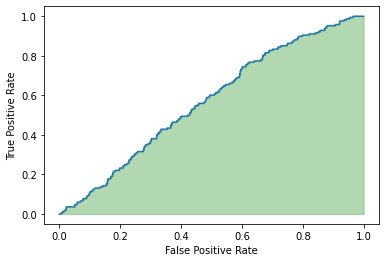

In [ ]:
#1、トレーニング・テストデータ分割でrandom_state=1234を追加したら、評価指数が、0.55から0.57に上がった。

import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
np.random.seed(0)
target = df.loc[:, ['TARGET']]


########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25, random_state=1234)
# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5878338927848797

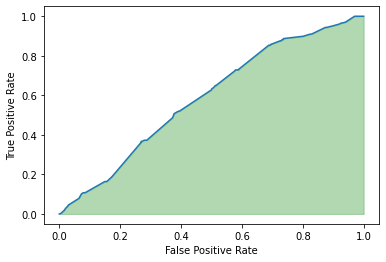

In [ ]:
#2、説明変数を'AMT_INCOME_TOTAL'だけにしたら、評価指数が、0.55から0.59に上がった。

import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

# X=df.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL']]
# np.random.seed(0)
# X= x.sample(n=10000)#サンプル数を10００0へ絞り込み
# print(type(X))
# print(len(X))
# print(X)
# print(X.info())
np.random.seed(0)
target = df.loc[:, ['TARGET']]


########################
# ロジスティック回帰
########################
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.587022847279282

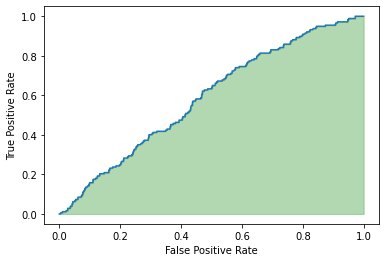

In [ ]:
#3,説明変数の標準化を実施したら、評価指数が、0.55から0.59に上がった。

import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
# np.random.seed(0)
# X= x.sample(n=10000)#サンプル数を10００0へ絞り込み
# print(type(X))
# print(len(X))
# print(X)
# print(X.info())
np.random.seed(0)
target = df.loc[:, ['TARGET']]
# np.random.seed(0)
# target = target.sample(n=10000)#サンプル数を10００0へ絞り込み
# print(target[:])
# print(type(target))
# print(len(target))

# stdsc = StandardScaler()
# # df["TARGET"] = stdsc.fit_transform(df[["TARGET"]].values)
# # df["AMT_INCOME_TOTAL','AMT_ANNUITY"] = stdsc.fit_transform(df[["AMT_INCOME_TOTAL','AMT_ANNUITY"]].values)
# target= stdsc.fit_transform(target.values)
# X = stdsc.fit_transform(X.values)

#標準化
X=X.values
X=X.tolist()
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)


target=target.values
# scaler.fit(target)
# target=scaler.transform(target)

########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)


                               TARGET  ...  AMT_REQ_CREDIT_BUREAU_YEAR
TARGET                       1.000000  ...                    0.032798
REGION_RATING_CLIENT_W_CITY  0.064264  ...                    0.036923

[2 rows x 105 columns]


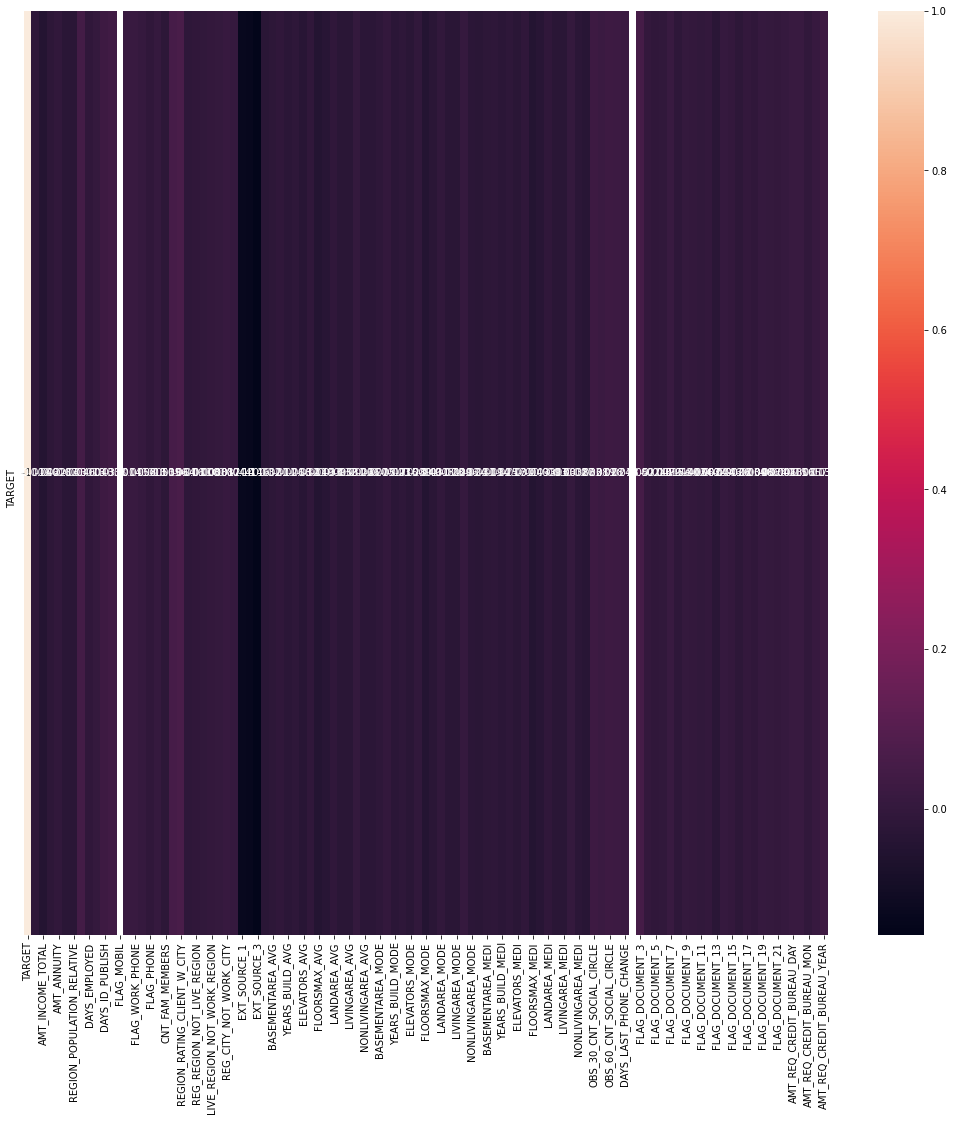

In [ ]:
#4説明は下


#目的変数と説明変数の相関を見て、目的変数と一番高い相関がある説明変数とで、学習させる。

# corr_mat = df.corr(method='pearson')
#  #データフレームの行（rows　axis＝0のこと）を隠さず表示
# pd.set_option('display.max_rows', None)

#  #データフレームの列（columns　axis＝1のこと）を隠さず全て表示
# pd.set_option("display.max_columns", None)
# print(corr_mat)

import seaborn as sns
# cor = df.corr()
# sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
fig, ax = plt.subplots(figsize=(18, 17)) 
df_corr = df.corr()
df_corr.sort_values(by='TARGET', ascending=False).head(1)
sns.heatmap(df_corr.sort_values(by='TARGET', ascending=False).head(1), annot=True)
#上位5個の特徴量の相関係数が高い組み合わせ
print(df_corr.sort_values(by='TARGET', ascending=False).head(2))
#REGION_RATING_CLIENT_W_CITY (Our rating of the region where client lives with taking city into account (1,2,3))
#（地域の評価）が、TARGETと一番相関高いので、これを説明変数とする

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5751310517901389

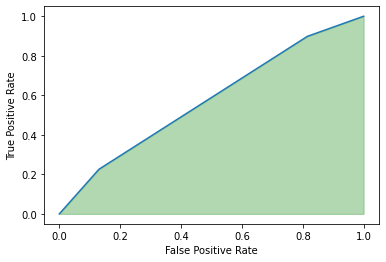

In [ ]:
#4,説明変数をREGION_RATING_CLIENT_W_CITYに変更したら、評価指数が、0.55から0.5７で上がった

import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

np.random.seed(0)
X=df.loc[:,['REGION_RATING_CLIENT_W_CITY']]
np.random.seed(0)
target = df.loc[:, ['TARGET']]


########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5792499739913418

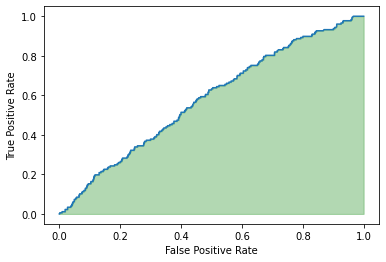

In [ ]:
#5,変数を対数変換したら、評価指数が、0.55から0.58で上がった

import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
X = np.log(X)
np.random.seed(0)
target = df.loc[:, ['TARGET']]
# target = np.log(target)


########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5705724986623864

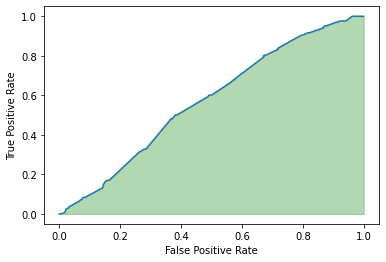

In [ ]:
#6,上記の１トレーニング・テストデータ分割でrandom_state=1234を追加＋2、説明変数を'AMT_INCOME_TOTAL'だけにし、＋
#3,説明変数の標準化を実施＋５変数を対数変換したら、評価指数が、0.55から0.57に上がった。

import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL']]
X = np.log(X)
np.random.seed(0)
target = df.loc[:, ['TARGET']]
# target = np.log(target)

#標準化
X=X.values
X=X.tolist()
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
# X = np.log(X)
target=target.values

########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25, random_state=1234)
# X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5878338927848797

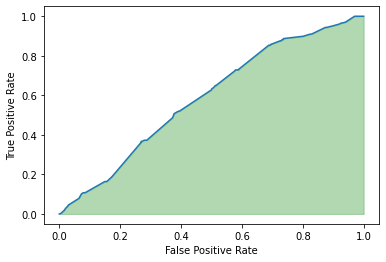

In [ ]:
#7, #3,説明変数の標準化を実施


import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# # df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
# df = df.drop(columns=df.select_dtypes(include='object').columns)
# df = df.dropna(how='any')
# df = df.dropna(how='any', axis=1)
# print(df)
# print(df.head(20))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools

np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL']]
np.random.seed(0)
target = df.loc[:, ['TARGET']]
# target = np.log(target)

#標準化
X=X.values
X=X.tolist()
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
# X = np.log(X)
target=target.values

########################
# ロジスティック回帰
########################
#from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
# LinearRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

# 予測　
Y_pred = Logi_model.predict(X_test)
Y_proba = Logi_model.predict_proba(X_test)

#ROC曲線の描画

fpr,tpr,threshold = metrics.roc_curve(Y_test,Y_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr,color='g',alpha=0.3)

metrics.auc(fpr,tpr)

問題４のまとめ

説明変数をAMT_INCOME_TOTALだけ＋説明変数の標準化を実施したら、
評価指数が、0.55から0.59に上がった。
また、csvファイルを見ると、こちらで作成したcsvファイルの方が、前のcsvファイルよりも全体的のデータがばらつきが少なく０.９以上になった。

In [ ]:
#説明変数の標準化+説明変数'AMT_INCOME_TOTAL'で実施。

import pandas as pd

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools


df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv', encoding='SHIFT-JIS', index_col=0)
# df = pd.read_csv("test.csv", encoding='SHIFT-JIS', index_col=0)
df = df.drop(columns=df.select_dtypes(include='object').columns)
df = df.dropna(how='any')
df = df.dropna(how='any', axis=1)


np.random.seed(0)
X=df.loc[:,['AMT_INCOME_TOTAL',"AMT_ANNUITY"]]
np.random.seed(0)
target = df.loc[:, ['TARGET']]

#標準化
X=X.values
X=X.tolist()
scaler = StandardScaler()
# scaler.fit(X)
X=scaler.fit_transform(X)


target=target.values

########################
# ロジスティック回帰
########################
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, target, train_size= 0.75, test_size=0.25)
Logi_model = LogisticRegression()
Logi_model.fit(X_train, Y_train)


#ROC曲線で評価する

import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/DIC/application_test.csv', encoding='SHIFT-JIS', index_col=0)
# df2 = df2.drop(columns=df2.select_dtypes(include='object').columns)
# df2 = df2.dropna(how='any')
# df2 = df2.dropna(how='any', axis=1)

x2=df2.loc[:,['AMT_INCOME_TOTAL',"AMT_ANNUITY"]]
test_mean2=x2.copy()
test_mean2["AMT_ANNUITY"] = test_mean2["AMT_ANNUITY"].fillna(test_mean2["AMT_ANNUITY"].mean())
print(test_mean2.isnull().sum())
print(len(test_mean2))

# Y = df.loc[:, ['TARGET']]

# 予測　
Y_pred10 = Logi_model.predict(test_mean2)
Y_proba10 = Logi_model.predict_proba(test_mean2)

# print(Y_pred10)
# print(Y_proba10)


seikai_list10 = []
for i in range(len(Y_proba10)):
  if(Y_pred10[i]==0):
    seikai_list10.append(Y_proba10[i,0])
  else:
    seikai_list10.append(Y_proba10[i,1])

#丸め込みは　round　を使用
seikai_list10 = [round(seikai_list10[n], 2) for n in range(len(seikai_list10 ))] 
# print(seikai_list10)
# print(len(seikai_list10))

import csv

f２ = open('/content/drive/MyDrive/DIC/Credit_information_learning.csv2' ,'w' )  #既存でないファイル名を作成してください

header=['SK_ID_CURR','TARGET']
# l=df2.iloc[:, [0]].values.tolist()

# index = ['ONE', 'TWO', 'THREE']
index = df2.index #インデックス（行列名）をデータフレームから抽出して変数indexに代入
writer = csv.writer(f2)
# w = csv.writer(file)
writer.writerow(header)
for i, row in zip(index, seikai_list10):
  writer.writerow([i] + [row])

# w.writerow(['SK_ID_CURR','TARGET'])

# w.writerows(df2.iloc[:, [0]])

f2.close()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AMT_INCOME_TOTAL    0
AMT_ANNUITY         0
dtype: int64
48744
